# Applied Linear Algebra - Lab 1
Ferdowsi University of Mashhad - Computer Engineering Department

* [Numpy](#Numpy)
* [Exercise 1](#Exercise-1)
* [Exercise 2](#Exercise-2)
* [Exercise 3](#Exercise-3)
* [Implementing Gaussian Elimination](#Implementing-Gaussian-Elimination) 
* [Polynomial Interpolation](#Polynomial-Interpolation)
* [Hill Cipher Encryption](#Hill-Cipher-Encryption)
    * [Encryption](#Encryption) 
    * [Decryption](#Decryption)
* [Known plaintext attack on Hill Cipher](#Known-plaintext-attack-on-Hill-Cipher)

# Numpy

Datasets can be made of collections of images, sounds, videos, documents, numerical measurements, or, really anything. Despite the diversity, it will help us to think of all data fundamentally as arrays of numbers.

| Data type	    | Arrays of Numbers? |
|---------------|-------------|
|Images | Pixel brightness across different channels|
|Videos | Pixels brightness across different channels for each frame | 
|Sound | Intensity over time |
|Numbers | No need for transformation | 
|Tables | Mapping from strings to numbers |


Therefore, the efficient storage and manipulation of large arrays of numbers is really fundamental to the process of doing data science. Numpy is one of the libraries within the scientific stack that specialize in handling numerical arrays and data tables. 

[Numpy](http://www.numpy.org/) is short for _numerical python_, and provides functions that are especially useful when you have to work with large arrays and matrices of numeric data, like matrix multiplications.  

The array object class is the foundation of Numpy, and Numpy arrays are like lists in Python, except that every thing inside an array must be of the same type, like int or float. As a result, arrays provide much more efficient storage and data operations, especially as the arrays grow larger in size. However, in other ways, NumPy arrays are very similar to Python's built-in list type, but with the exception of Vectorization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display
from sympy import mod_inverse
from typing import Dict, List

# Global floating point precision
precision = 2

## Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The shape of an array is a tuple of integers giving the size of the array along each dimension. A a one dimensional array (shape `(n,)`) corresponds to a vector.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a 1 dimensional array i.e. a vector

print("a is type: ", type(a))
print("The shape of the vector a is: ", a.shape)
print(a[0], a[1], a[2])  # indexing
a[0] = 5  # Change an element of the array
print(a)     

a is type:  <class 'numpy.ndarray'>
The shape of the vector a is:  (3,)
1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a 2 dimensional array i.e. a matrix
print(b)
print("The shape of the matrix b is: ", b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]]
The shape of the matrix b is:  (2, 3)
1 2 4


## Array Arithmetic
Basic mathematical functions operate elementwise on arrays and matrices (which are just 2D arrays), and are available both as operator overloads and as functions in the numpy module:

In [4]:
# Define two matrices
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Elementwise sum:
print(x + y)
print(np.add(x, y))

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]


In [5]:
# Elementwise difference:
print(x - y)
print(np.subtract(x, y))

[[-4 -4]
 [-4 -4]]
[[-4 -4]
 [-4 -4]]


In [7]:
# Elementwise product:
#  * is elementwise multiplication, not matrix multiplication!
print(x * y)
print(np.multiply(x, y))

[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]


In [8]:
# Elementwise square root:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [9]:
# Elementwise division:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


<!-- BEGIN QUESTION -->

# Exercise 1
Given two vectors $v_1$ and $v_2$, calculate $v_3$ where
$$
v_3 = 12(v_1 - 2v_2)
$$

In [10]:
# define the two vectors
v1 = np.array([2,3,4,7])
v2 = np.array([6,1,0,3])

# calculate v3
v3 = 12 * (v1 - 2 * v2) # SOL 
print(v3)

[-120   12   48   12]


<!-- END QUESTION -->

We use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [11]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors.
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

# Matrix multiplication.
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

x = np.matrix(x)
y = np.matrix(y)
x*y

219
219
219
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


matrix([[19, 22],
        [43, 50]])

We can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators +, -, * to use matrix algebra.
Make sure the dimensions of the two matrices are compatible. You can use the `np.transpose()` function or the `T` method of NumPy vectors and matrices.

In [12]:
# Create two row vectors
v = np.matrix(v)
w = np.matrix(w)

# Create two matrices
x = np.matrix(x)
y = np.matrix(y)

# Inner product of vectors.
print(v * w.T)

# Matrix multiplication.
print(x * y)

# Matrix Vector multiplication
print(x * v.T)

[[219]]
[[19 22]
 [43 50]]
[[29]
 [67]]


## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types.

## Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:


In [13]:
# We use these when the elements of the 
# arrays are originally unknown but their size is known.

np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
np.ones((2,3), dtype = np.int_)

array([[1, 1, 1],
       [1, 1, 1]])

In [15]:
np.empty( (2,3) )   

array([[1.39059287e-316, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [16]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [17]:
# Create a 3x3 Identity Matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<!-- BEGIN QUESTION -->

# Exercise 2
Given vector $v$, calculate the average of its elements using dot product.

In [18]:
# define vector v
v = np.array([ 3, 5, -3, 7, 1 ])

# vector of ones
ones_vector = np.ones_like(v) # SOL

# calculating the average using dot product
average = np.dot(v, ones_vector) / v.shape[0] # SOL 
average

2.6

import numpy as np
import matplotlib.pyplot as plt

# define the vector. this is a row vector
u = np.array([3, -4])
u = np.matrix(u)
u = u.T
print(u.shape)

# define the 2x2 matrix
A = np.array([ # SOL 
    [1, -3],
    [2, -2]
])

# output vector is Au (convert u to column)
v = A @ u


# plotting
plt.plot([0,u[0]],[0,u[1]],label='u')
plt.plot([0,v[0]],[0,v[1]],label='Au')
plt.grid()
plt.axis((-2, 12, -6, 12))
plt.legend()
plt.show()<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 3
Matrices can *transform* the vectors that they are multiplied with.
define vector $ u = [ 3, -4 ]^T $ and matrix $ A = \begin{bmatrix}1&-3\\2&-2 \end{bmatrix}$ then calculate and plot the result of
$ Au$ which we'll call $v$.

Make sure that $u$ is a $2\times1$ column vector.

(2, 1)
[[ 3]
 [-4]]
<class 'numpy.matrix'>
[[15]
 [14]]


/home/hamed/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


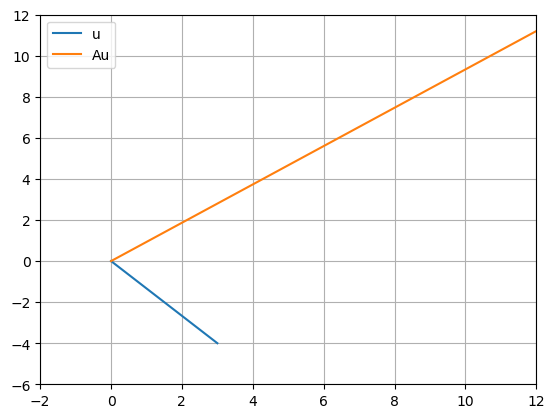

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# define the vector. this is a row vector
u = np.array([3, -4])
u = np.matrix(u)
u = u.T
print(u.shape)
print(u)
print(type(u))

# define the 2x2 matrix
A = np.array([ # SOL 
    [1, -3],
    [2, -2]
])
A = np.matrix(A)

# output vector is Au (convert u to column)
v = A * u
print(v)

# plotting
plt.plot([0,u[0]],[0,u[1]],label='u')
plt.plot([0,v[0]],[0,v[1]],label='Au')
plt.grid()
plt.axis((-2, 12, -6, 12))
plt.legend()
plt.show()

[[ 3]
 [-4]]
(2, 1)
<class 'numpy.ndarray'>
[[15]
 [14]]


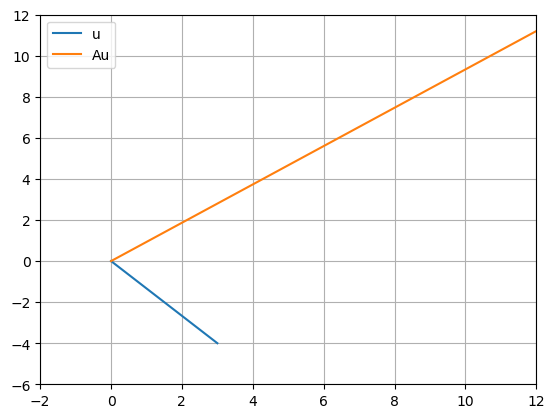

In [20]:
# define the vector. this is a row vector
u = np.array([3, -4])[:, None] # SOL
print(u)
print(u.shape)
print(type(u))

# define the 2x2 matrix
A = np.array([ # SOL 
    [1, -3],
    [2, -2]
])

# output vector is Au (convert u to column)
v = A @ u
print(v)

# plotting
plt.plot([0,u[0]],[0,u[1]],label='u')
plt.plot([0,v[0]],[0,v[1]],label='Au')
plt.grid()
plt.axis((-2, 12, -6, 12))
plt.legend()
plt.show()

<!-- END QUESTION -->

### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [21]:
M = np.random.randint(100, size=(10, 12))
print("Initial matrix: ")
print(M)

Initial matrix: 
[[ 6 34 63 95 26 97 16 80 59 61 44 93]
 [89 21  9 61 63 26 69 40 89 42 68 67]
 [10 55  0 70 90  7  6 73  4 73 42 86]
 [ 3 39 94 97 54 12 86 68 68 76 80  8]
 [43 53 20  0 49 41 58 85 46 86 71  6]
 [81 66 61 83 38 87 82 37 26 89  7 38]
 [61 55 48 62 85 55 15 99 66 30 26 60]
 [71 42 83 51 24 58 53 45 73 88 21 44]
 [44 69 24 47 88 96 58 57 72 38 98 94]
 [42 16 20  8 12 87 91 65 86  6 89 53]]


In [22]:
M[1,:] # second row

array([89, 21,  9, 61, 63, 26, 69, 40, 89, 42, 68, 67])

In [23]:
M[:,1] # second column

array([34, 21, 55, 39, 53, 66, 55, 42, 69, 16])

In [24]:
# assignment can also work for rows and columns. This is really powerful and fast!
M[1,:] = 0
M

array([[ 6, 34, 63, 95, 26, 97, 16, 80, 59, 61, 44, 93],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10, 55,  0, 70, 90,  7,  6, 73,  4, 73, 42, 86],
       [ 3, 39, 94, 97, 54, 12, 86, 68, 68, 76, 80,  8],
       [43, 53, 20,  0, 49, 41, 58, 85, 46, 86, 71,  6],
       [81, 66, 61, 83, 38, 87, 82, 37, 26, 89,  7, 38],
       [61, 55, 48, 62, 85, 55, 15, 99, 66, 30, 26, 60],
       [71, 42, 83, 51, 24, 58, 53, 45, 73, 88, 21, 44],
       [44, 69, 24, 47, 88, 96, 58, 57, 72, 38, 98, 94],
       [42, 16, 20,  8, 12, 87, 91, 65, 86,  6, 89, 53]])

In [25]:
M[:,2] = -1
M

array([[ 6, 34, -1, 95, 26, 97, 16, 80, 59, 61, 44, 93],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10, 55, -1, 70, 90,  7,  6, 73,  4, 73, 42, 86],
       [ 3, 39, -1, 97, 54, 12, 86, 68, 68, 76, 80,  8],
       [43, 53, -1,  0, 49, 41, 58, 85, 46, 86, 71,  6],
       [81, 66, -1, 83, 38, 87, 82, 37, 26, 89,  7, 38],
       [61, 55, -1, 62, 85, 55, 15, 99, 66, 30, 26, 60],
       [71, 42, -1, 51, 24, 58, 53, 45, 73, 88, 21, 44],
       [44, 69, -1, 47, 88, 96, 58, 57, 72, 38, 98, 94],
       [42, 16, -1,  8, 12, 87, 91, 65, 86,  6, 89, 53]])

In [26]:
M[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([[ 6, 34, -1, 95, 26, 97, 16, 80, 59, 61, 44, 93],
       [10, 55, -1, 70, 90,  7,  6, 73,  4, 73, 42, 86],
       [43, 53, -1,  0, 49, 41, 58, 85, 46, 86, 71,  6],
       [61, 55, -1, 62, 85, 55, 15, 99, 66, 30, 26, 60],
       [44, 69, -1, 47, 88, 96, 58, 57, 72, 38, 98, 94]])

In [27]:
M[:3] # first three rows

array([[ 6, 34, -1, 95, 26, 97, 16, 80, 59, 61, 44, 93],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10, 55, -1, 70, 90,  7,  6, 73,  4, 73, 42, 86]])

In [28]:
M[3:] # rows from row 3 to the end

array([[ 3, 39, -1, 97, 54, 12, 86, 68, 68, 76, 80,  8],
       [43, 53, -1,  0, 49, 41, 58, 85, 46, 86, 71,  6],
       [81, 66, -1, 83, 38, 87, 82, 37, 26, 89,  7, 38],
       [61, 55, -1, 62, 85, 55, 15, 99, 66, 30, 26, 60],
       [71, 42, -1, 51, 24, 58, 53, 45, 73, 88, 21, 44],
       [44, 69, -1, 47, 88, 96, 58, 57, 72, 38, 98, 94],
       [42, 16, -1,  8, 12, 87, 91, 65, 86,  6, 89, 53]])

In [29]:
# slice a block from the original array
M[1:4, 1:4]

array([[ 0, -1,  0],
       [55, -1, 70],
       [39, -1, 97]])

In [30]:
# slice with different strides
M[::2, ::2]

array([[ 6, -1, 26, 16, 59, 44],
       [10, -1, 90,  6,  4, 42],
       [43, -1, 49, 58, 46, 71],
       [61, -1, 85, 15, 66, 26],
       [44, -1, 88, 58, 72, 98]])

# Implementing Gaussian Elimination
In this exercise we'll try to implement gaussian elimination.
First we create a couple of functions for elementry row operations.

Each of the elementary row operations is the result of matrix multiplication by an elementary matrix (on the left).

# Exercise 4
## Row Swap
For swapping row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by an $m\times m$ matrix $E$ where $E$ is equal to the identity matrix $I_m$ except $E_{ii}=E_{jj}=0,$ and $E_{ij}=E_{ji}=1$. (Equivalently, we can interchange $i$-th row and $j$-th row of the identity matrix $I$ to get $E$.)
For example, if $A$ is a $3\times 3$ matrix and we would like to swap row $1$ with row $3$, then $E$ would be equal to:
  
  $$
   \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0\\ 1 & 0 & 0 \end{bmatrix}
  $$
  
**Exercise4.1:** Now try to define the `row_swap` function which take a matrix $A$ and two indices $i$ and $j$ as its inputs and returns a matrix which is equal to $A$ with its $i$-th row and $j$-th row swapped.

In [2]:
def row_swap(A, i, j):
    "Swap row i and j in matrix A."
    m = A.shape[0] # SOL 
    E = np.eye(m)
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    # ...
    
    # SOL # SOL # SOL 
    E[i, i] = 0
    E[j, j] = 0
    E[i, j] = 1
    E[j, i] = 1
    
    return np.around(E @ A, precision)

In [32]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row exchange:")
print(A)
print("After row exchange:")
print(row_swap(A, 1, 2))

Before row exchange:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row exchange:
[[ 1.  2.  3.]
 [ 7. -8.  9.]
 [ 4. -5.  6.]]


## Row Sum
 For summing $k \times$ row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by the matrix $E$ where $E$  is equal to the identity matrix $I_m$ except $E_{ji}=k$. For example, if $A$ is 3 by 5 and we want to add -2 times $3$ to row $1$. then $E$ would be equal to:
  
   $$
   \begin{bmatrix} 1 & 0 & -2 \\ 0 & 1 & 0\\ 0 & 0 & 1 \end{bmatrix}
  $$

**Exercise4.2:** Now try to define the `row_sum` function which takes matrix $A$, scalar $k$ and indices $i, j$ as its inputs and returns the matrix resulting from adding $k$ times row $i$  to row $j$  in the matrix $A$.

In [3]:
# A simple exception for when the indices given to row_sum function are equal
class GERowSwapSameIndexException(Exception):
    def __init__(self):
        super().__init__("Error: indices given to the function must be different.")
        
def row_sum(A,k,i,j):
    "Add k times row i to row j in matrix A."
    if (i == j):
        raise GERowSwapSameIndexException
        
    m = A.shape[0]  # SOL 
    E = np.eye(m)   # SOL
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    #E[j, :] += k * E[i, :]
    # ... # SOL 
    
    # SOL# SOL# SOL# SOL
    E[j, i] = k 
    return np.around(E @ A, precision)

In [34]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row sum:")
print(A)
print("After row sum:")
print(row_sum(A, 2, 1, 2))

Before row sum:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row sum:
[[  1.   2.   3.]
 [  4.  -5.   6.]
 [ 15. -18.  21.]]


## Row Scale
For summing $k \times$ row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by the matrix $E$ where $E$  is equal to the identity matrix $I_m$ except $E_{ii}=k$. For example, if $A$ is 4 by 3 and we want to multiply row 3 by -4 then $E$ would be equal to:
  
   $$
   \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 &0\\ 0 & 0 & -4 &0 \\
       0&  0 &0 &1 \end{bmatrix}
  $$
**Exercise4.3:** The implementation of a function that scales a row of a matrix must be trivial by now. It take a matrix $A$, a scalar $k$ and an index $i$ and returns the matrix that results from  $k$ times row $i$ in the matrix $A$.

In [4]:
def row_scale(A,k,i):
    "Multiply row i by k in matrix A"
    m = A.shape[0] # SOL 
    E = np.eye(m)  # SOL 
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
   # SOL# SOL# SOL# SOL# SOL
    E[i, i] = k
    return np.around(E @ A, precision)

In [36]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row scale:")
print(A)
print("After row scale:")
print(row_scale(A, -3, 1))

Before row scale:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row scale:
[[  1.   2.   3.]
 [-12.  15. -18.]
 [  7.  -8.   9.]]


## Gaussian Elimination
Having defined the elementary row operations, now let's implement gaussian elimination.

**Exercise4.4:** Define the function `eliminate` which takes a matrix $A$ and a vector $b$ and applies gaussian elimination on them and then returns the resulting matrix and vector.

In [37]:
# A simple exception for when the indices given to row_sum function are equal
class GEEliminationErr(Exception):
    def __init__(self, msg):
        super().__init__(msg)
        
def is_zero(x, epsilon=1e-10):    
    return abs(x) < epsilon

def gaussian_elimination(A):
    number_rows = A.shape[0]
    try:
        for i in range(number_rows):
            pivot = A[i,i]
            
            if is_zero(pivot):
                swap_index = (np.where(A[i+1:,i] != 0)[0][0]) + i + 1
                A[[i, swap_index], :] = A[[swap_index, i], :]
                pivot = A[i,i]
                
            # Eliminate elements below the pivot
            loopRange = range(i+1, number_rows)
            for j in loopRange:
                multiplier = A[j,i] / pivot 
                print(type(multiplier))
                print(multiplier, j, i)
                print(A[j, :] - multiplier * A[i, :])

                A[j, :] = A[j, :] - multiplier * A[i, :]
                print("Row operation: ")
                print(A)
    
        if A[number_rows-1, number_rows-1] == 0:
            raise GEEliminationErr("Matrix is not full rank. There are no unique solution.")
    
    except IndexError as exc:
        raise GEEliminationErr("Pivot not found. There are no unique solutions.") from exc
    return A

In [38]:
test = np.array([[3, 2, 1.0], [5, 8, 3], [1, 1, 5]])
print(type(test[0][0]))
gaussian_elimination(test)

<class 'numpy.float64'>
<class 'numpy.float64'>
1.6666666666666667 1 0
[0.         4.66666667 1.33333333]
Row operation: 
[[3.         2.         1.        ]
 [0.         4.66666667 1.33333333]
 [1.         1.         5.        ]]
<class 'numpy.float64'>
0.3333333333333333 2 0
[0.         0.33333333 4.66666667]
Row operation: 
[[3.         2.         1.        ]
 [0.         4.66666667 1.33333333]
 [0.         0.33333333 4.66666667]]
<class 'numpy.float64'>
0.07142857142857145 2 1
[ 0.00000000e+00 -5.55111512e-17  4.57142857e+00]
Row operation: 
[[ 3.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  4.66666667e+00  1.33333333e+00]
 [ 0.00000000e+00 -5.55111512e-17  4.57142857e+00]]


array([[ 3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  4.66666667e+00,  1.33333333e+00],
       [ 0.00000000e+00, -5.55111512e-17,  4.57142857e+00]])

In [33]:
# A simple exception for when the indices given to row_sum function are equal
class GEEliminationErr(Exception):
    def __init__(self, msg):
        super().__init__(msg)
        
def is_zero(x, epsilon=1e-10):    
    return abs(x) < epsilon

def gaussian_elimination(A):
    number_rows = A.shape[0]
    try:
        for i in range(number_rows):
            pivot = A[i, i] #SOL ...
            
            if is_zero(pivot):
                swap_index = (np.where(A[i+1:,i] != 0)[0][0]) + i + 1
                A = row_swap(A, i, swap_index) # SOL 
                
            # Eliminate elements below the pivot
            loopRange = number_rows - 1 # - i # SOL 
            for j in range(loopRange):
                multiplier = A[j+1, i] / A[i, i] # SOL  
                A[j+1, :] = A[j+1, :] - multiplier * A[i, :]
                print("Row operation: ")
                print(A)
    
        if A[number_rows-1, number_rows-1] == 0:
            raise GEEliminationErr("Matrix is not full rank. There are no unique solution.")
    
    except IndexError as exc:
        raise GEEliminationErr("Pivot not found. There are no unique solutions.") from exc
    return A

In [34]:
# A simple exception for when the indices given to row_sum function are equal
class GEEliminationErr(Exception):
    def __init__(self, msg):
        super().__init__(msg)
        
def is_zero(x, epsilon=1e-10):    
    return abs(x) < epsilon

def gaussian_elimination(A):
    number_rows = A.shape[0]
    try:
        for i in range(number_rows):
            pivot = A[i, i] #SOL ...
            
            if is_zero(pivot):
                swap_index = (np.where(A[i+1:,i] != 0)[0][0]) + i + 1
                A = row_swap(A, i, swap_index) # SOL 
                
            # Eliminate elements below the pivot
            loopRange = number_rows - 1 - i # SOL 
            for j in range(loopRange):
                multiplier = A[i+j+1, i] / A[i, i] # SOL  
                A = row_sum(A, -multiplier, i, i+j+1) # SOL 
                print("Row operation: ")
                print(A)
    
        if A[number_rows-1, number_rows-1] == 0:
            raise GEEliminationErr("Matrix is not full rank. There are no unique solution.")
    
    except IndexError as exc:
        raise GEEliminationErr("Pivot not found. There are no unique solutions.") from exc
    return A

In [36]:
test = np.array([[0, 2, 1], [5, 8, 3], [1, 1, 5]])
gaussian_elimination(test)

Row operation: 
[[5. 8. 3.]
 [0. 2. 1.]
 [1. 1. 5.]]
Row operation: 
[[ 5.   8.   3. ]
 [ 0.   2.   1. ]
 [ 0.  -0.6  4.4]]
Row operation: 
[[5.  8.  3. ]
 [0.  2.  1. ]
 [0.  0.  4.7]]


array([[5. , 8. , 3. ],
       [0. , 2. , 1. ],
       [0. , 0. , 4.7]])

In [40]:
temp = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 0]
])
np.where(temp[1:, 0] != 0)

(array([0]),)

**Exercise4.5:** Next, implement the `back_substitution` function. This function solves a linear system of equations that has been transformed into reduced row-echelon form. It takes a matrix $A$ and a vector $b$ in their rref forms and returns the solution of $Ax=b$.

In [22]:
def back_substitution(A,b):
    n = A.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(n-1, i, -1):
            tmp -= x[j]*A[i, j] # SOl 
        x[i] = tmp/A[i, i] # SOL 
    return np.around(np.matrix(x), precision)

In [23]:
# define an example matrix 
A = np.matrix([[1,2,3], [1,2,5], [3,9,7]], dtype = float)
print("Original Matrix")
print(A)

# define vector b
b = np.mat([2,3,1], dtype = float)
b = b.reshape(3,1)

Aug = np.concatenate((A, b), axis=1)
print("Augmented Matrix")
print(Aug)

# Applying the elimination
ref_Aug = gaussian_elimination(Aug)
# Extract everything BUT the last column of Aug
ref_A = ref_Aug[:, :-1].copy()
# Extract the last column of Aug
ref_b = ref_Aug[:, -1].copy()
print('rref a: ', ref_A)
print('rred b', ref_b)
z = back_substitution(ref_A, ref_b)
print("Final solution of system of equations is ")
print(z.T)

Original Matrix
[[1. 2. 3.]
 [1. 2. 5.]
 [3. 9. 7.]]
Augmented Matrix
[[1. 2. 3. 2.]
 [1. 2. 5. 3.]
 [3. 9. 7. 1.]]
<class 'numpy.float64'>
1.0 1 0
[[0. 0. 2. 1.]]
Row operation: 
[[1. 2. 3. 2.]
 [0. 0. 2. 1.]
 [3. 9. 7. 1.]]
<class 'numpy.float64'>
3.0 2 0
[[ 0.  3. -2. -5.]]
Row operation: 
[[ 1.  2.  3.  2.]
 [ 0.  0.  2.  1.]
 [ 0.  3. -2. -5.]]
<class 'numpy.float64'>
0.0 2 1
[[0. 0. 2. 1.]]
Row operation: 
[[ 1.  2.  3.  2.]
 [ 0.  3. -2. -5.]
 [ 0.  0.  2.  1.]]
rref a:  [[ 1.  2.  3.]
 [ 0.  3. -2.]
 [ 0.  0.  2.]]
rred b [[ 2.]
 [-5.]
 [ 1.]]
Final solution of system of equations is 
[[ 3.17]
 [-1.33]
 [ 0.5 ]]



# Polynomial Interpolation
Polynomial interpolation is a procedure for modeling a set of precise data points
using a polynomial function, 𝑝(𝑥), that fits the data exactly (passes through all
provided data points). The data points are normally obtained from a complicated
mathematical model, 𝑓(𝑥), of an engineering or scientific system derived from
physical principles. Once an interpolation polynomial is computed, it can be used to
replace the complicated mathematical model for the purpose of analysis and design.
For instance, the interpolating polynomial can be used to estimate the value of the
function at a new point 𝑥′, as 𝑓(𝑥′) ≅ 𝑝(𝑥
′
). The solution for the coefficients of the
interpolation polynomial 𝑝(𝑥) can be determined by solving an associated system
of linear equations, or can be computed using formulas.
$$ p(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_2 x^2 + a_1 x + a_0 $$
$$ p(x_i) = y_i \qquad\mbox{for all } i \in \left\{ 0, 1, \dots, n\right\}.$$

$$P\vec{a} = \vec{y} \rightarrow \begin{bmatrix}
x_0^n  & x_0^{n-1} & x_0^{n-2} & \ldots & x_0 & 1 \\
x_1^n  & x_1^{n-1} & x_1^{n-2} & \ldots & x_1 & 1 \\
\vdots & \vdots    & \vdots    &        & \vdots & \vdots \\
x_n^n  & x_n^{n-1} & x_n^{n-2} & \ldots & x_n & 1
\end{bmatrix}
\begin{bmatrix} a_n \\ a_{n-1} \\ \vdots \\ a_0 \end{bmatrix}  =
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}.$$


We have to solve this system for ak to construct the interpolant p(x). The matrix on the left is commonly referred to as a Vandermonde matrix. 

Note that for interpolating an $n$-degree polynomial function, we only need $n+1$ different percise data points from that polynomial in order to solve the above linear equation. 

# Explanatory Question 1: 
**Question**: why we need $n+1$ differnet data points from the original polynomial function? why do they need to be "different"?

# Exercise 5
Find a degree 3 polynomial that best fits the points:
$$(1, 3),\; (2, -2),\; (3, -5),\; (4, 0)$$

(use the `gaussian_elimination` function that you implemented above)

In [24]:
P = np.array([ # SOL 
    [1**3, 1**2, 1**1, 1**0],
    [2**3, 2**2, 2**1, 2**0],
    [3**3, 3**2, 3**1, 3**0],
    [4**3, 4**2, 4**1, 4**0],  
])
y = np.array([3, -2, -5, 0])[:, None] # SOL 

Aug = np.concatenate((P, y), axis=1) # SOL 
print("Augmented Matrix")
print(Aug)

# Applying the elimination
ref_Aug = gaussian_elimination(Aug) # SOL 
# Extract everything BUT the last column of Aug
ref_P = ref_Aug[:, :-1].copy() # SOL 
# Extract the last column of Aug
ref_y = ref_Aug[:, -1].copy() # SOL 

z = back_substitution(ref_P, ref_y) # SOL 
print("Final solution of system of equations is ")
print(z.T)

Augmented Matrix
[[ 1  1  1  1  3]
 [ 8  4  2  1 -2]
 [27  9  3  1 -5]
 [64 16  4  1  0]]
<class 'numpy.float64'>
8.0 1 0
[  0.  -4.  -6.  -7. -26.]
Row operation: 
[[  1   1   1   1   3]
 [  0  -4  -6  -7 -26]
 [ 27   9   3   1  -5]
 [ 64  16   4   1   0]]
<class 'numpy.float64'>
27.0 2 0
[  0. -18. -24. -26. -86.]
Row operation: 
[[  1   1   1   1   3]
 [  0  -4  -6  -7 -26]
 [  0 -18 -24 -26 -86]
 [ 64  16   4   1   0]]
<class 'numpy.float64'>
64.0 3 0
[   0.  -48.  -60.  -63. -192.]
Row operation: 
[[   1    1    1    1    3]
 [   0   -4   -6   -7  -26]
 [   0  -18  -24  -26  -86]
 [   0  -48  -60  -63 -192]]
<class 'numpy.float64'>
4.5 2 1
[ 0.   0.   3.   5.5 31. ]
Row operation: 
[[   1    1    1    1    3]
 [   0   -4   -6   -7  -26]
 [   0    0    3    5   31]
 [   0  -48  -60  -63 -192]]
<class 'numpy.float64'>
12.0 3 1
[  0.   0.  12.  21. 120.]
Row operation: 
[[  1   1   1   1   3]
 [  0  -4  -6  -7 -26]
 [  0   0   3   5  31]
 [  0   0  12  21 120]]
<class 'numpy.float64'

# This is a polynomial of order 3.


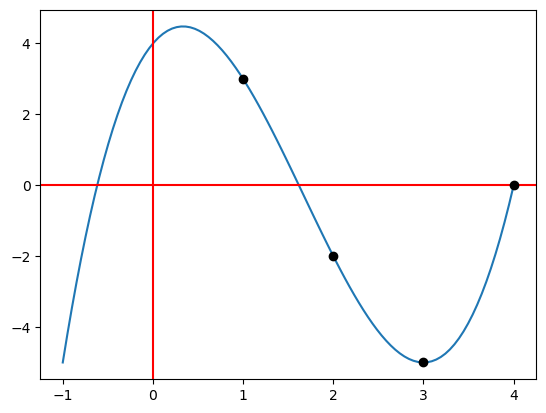

In [44]:
# Plotting the polynomial
def polynomial_coefficients(xs, coeffs):
    order = len(coeffs)
    print(f'# This is a polynomial of order {order - 1}.')
    ys = np.zeros(len(xs))  # Initialise an array of zeros of the required length.
    for i in range(order):
        ys += coeffs[i] * xs ** i
    return ys


xs = np.linspace(-1, 4, 100)  # Change this range according to your needs. Start, stop, number of steps.
coeffs = z.flatten().tolist()[::-1]

plt.plot(xs, polynomial_coefficients(xs, coeffs))
plt.axhline(y=0, color='r')  # Show xs axis
plt.axvline(x=0, color='r')  # Show y axis
points = [(1, 3), (2, -2), (3, -5), (4, 0)]
for p in points:
    plt.plot(p[0], p[1], 'o', color='black');
plt.plot(1, 3)
plt.show()

# Hill Cipher Encryption

Before we dive into the details of Hill Cipher, let’s first take a look at its history and how it came to be used in cryptography.

### Hill Cipher History
[Cryptography](https://intellipaat.com/blog/what-is-cryptography/), the study, and practice of secure communication through unique methods and techniques prevents third parties or organizations from accessing sensitive information. In modern cryptography, concepts like confidentiality, data integrity, authentication, etc. play a crucial role.

The Hill Cipher method was invented and developed in 1929 by Lester S. Hill, a renowned American mathematician. Hill Cipher makes use of [Modular Inverses](http://en.wikipedia.org/wiki/Modular_multiplicative_inverse), Matrix Multiplication, Determinant of matrices, [Matrix Adjugates](http://en.wikipedia.org/wiki/Adjugate_matrix)(for finding inverse) and [Modulo Arithmetic](http://en.wikipedia.org/wiki/Modular_arithmetic).

### What is Hill Cipher
The Hill cipher is a polygraphic substitution cipher built on concepts from Linear Algebra. Polygraphic substitution is a uniform substitution where a block of letters is substituted by a word, character, number, etc.

Hill cipher uses a key matrix to encrypt and decrypt messages. in this exercise we use a $2 \times 2$ key matrix. (we will explain how this key can be used to encrypt/decrypt later)

before diving into examples. lets define a substitution scheme for mapping messages (strings) into numerical vectors. (we can't do linear algebraic operations on literal characters!). to keep it simple, lets assume the alphabet only consists of lowercase english letters and the whitespace $\text{" "}$.
we use the following map to convert characters into numbers: 

|             |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |     |
| ----------- |-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Letter      |  a  |  b  |  c  |  d  |  e  |  f  |  g  |  h  |  i  |  j  |  k  |  l  |  m  |  n  |  o  |  p  |  q  |  r  |  s  |  t  |  u  |  v  |  w  |  x  |  y  |  z  | $\text{" "}$ |
| Number      |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  11 |  12 |  13 |  14 |  15 |  16 |  17 |  18 |  19 |  20 |  21 |  22 |  23 |  24 |  25 |  26 |

using this scheme, string 'la' corrseponds to a $2 \times 1$ vector
$\begin{pmatrix}
11 \\
0
\end{pmatrix}
$. Note that the alphabet size is 27. 

In [45]:
# build two dictionaries for converting character to number and vice versa: 
M = 27 # alphabet size
K = 2 # size of key matrix (key size), in the following exercises we'll only work with key size of 2

UPPER_CASE = 65
LOWER_CASE = 97

c2num = {}
num2c = {}
if M == 27: 
    for i in range(M-1): 
        c2num[chr(LOWER_CASE+i)] = i
        num2c[i] = chr(LOWER_CASE+i)
    c2num[' '] = 26
    num2c[26] = ' '
elif M == 26:
    for i in range(M): 
        c2num[chr(LOWER_CASE+i)] = i
        num2c[i] = chr(LOWER_CASE+i)
        
# util functions: 
def text_to_list(text: str) -> List[str]: 
    """
    splits the input string into chunks of size K, 
    if len(text) % K is not zero, 
    add a whitespace (' ') to the end of string. (assuming ' ' is in dict)
    """
    text_list = []
    for i in range(0, len(text), K):
        text_list.append(text[i:i+K])

    if len(text_list[-1]) == 1 and ' ' in c2num:
        text_list[-1] += ' '

    return text_list

def text2vec(text: str) -> np.ndarray:
    """
    returns np.array of the given string based on the
    character to number dictionary
    (each number is mapped to a character)
    """
    text_vec  = np.zeros(len(text))
    for idx, curr_c in enumerate(text):
        text_vec[idx] = c2num[curr_c]
    return text_vec

def vec2text(vec: np.ndarray) -> str:
    """
    returns string of the given np.array based on the 
    number to character dictionary
    (each character is mapped to a number)
    """
    res = ''
    for idx in range(vec.shape[0]): 
        res += num2c[vec[idx]]
    return res


In [46]:
# TESTING
print(c2num, '\n', num2c)

fum_la = 'fum la'
print(text2vec(fum_la))
print(vec2text(text2vec(fum_la)))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, ' ': 26} 
 {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: ' '}
[ 5. 20. 12. 26. 11.  0.]
fum la


## Encryption
Assuming we have a 2 by 2 key matrix (key size=2), to encrypt a message using the Hill Cipher we must first split the plaintext (input string) into chunks of 2 and turn them into 2 by 1 column vector. 

For example to encrypt the message "fum la", we need to split it into chunks of 2, and write these as column vectors, that is: 

$$
\text{"fum la"} \;\;\;
\underrightarrow{(1)}
\begin{pmatrix} \text{f} \\ \text{u} \end{pmatrix}
\begin{pmatrix} \text{m} \\ \text{" "} \end{pmatrix}
\begin{pmatrix} \text{l} \\ \text{a} \end{pmatrix}
\underrightarrow{(2)}
\begin{pmatrix} 5 \\ 20 \end{pmatrix}
\begin{pmatrix} 12 \\ 26 \end{pmatrix}
\begin{pmatrix} 11 \\ 0 \end{pmatrix}
$$
- (1): split string into chunks of 2
- (2): convert characters to numbers using the map explained above

Encrypting with the Hill cipher is built on the following operation:
$$
\text{E}(K, P) =( \;\; K_{2 \times 2} \times P_{2 \times 1} \;\; ) \;\; \text{mod 27}
$$
where $K$ is the key matrix, $P$ is the plain text (input string that we want to encrypt) in the vector form and $E$ is the encrypted text in vector form. the mod 27 above means that after calculating the 2 by 1 result of $K \times P$, remainder of 27 is returned.  (why 27? because the alphabet we chose has 27 characters and each character is mapped to and integer betweern 0-26)

Let's go step by step:
1. Set a 2 by 2 key matrix $K$. in our example we use 
$K = \begin{pmatrix}
7 & 8 \\
19 & 3
\end{pmatrix}$
2. convert the plain text ("fum la") into vector form, since our key matrix is 2 by 2, the vector needs to be 2 by 1 for matrix multiplication to be possible. in our case, the plain text is 6 letters long so we need to split into cunks of 2 and convert them into numerical vector: 
$$
\text{"fum la"} \;\;\;
\underrightarrow{(1)}
\begin{pmatrix} \text{f} \\ \text{u} \end{pmatrix}
\begin{pmatrix} \text{m} \\ \text{" "} \end{pmatrix}
\begin{pmatrix} \text{l} \\ \text{a} \end{pmatrix}
\underrightarrow{(2)}
\begin{pmatrix} 5 \\ 20 \end{pmatrix}
\begin{pmatrix} 12 \\ 26 \end{pmatrix}
\begin{pmatrix} 11 \\ 0 \end{pmatrix}
$$
3. now we can multiply each 2 by 1 plain text vector with the key matrix, take the modulo (remainder) of the resulting 2 by 1 vectors by 27 (since alphabet size is 27), and concatenate the results to get "guwjxu", the final ciphertext.
$$E(K, P) = (K \times P) mod 27$$


$$
K
\times 
\begin{bmatrix} \text{f} \\ \text{u} \end{bmatrix}
 = 
\begin{bmatrix}
7 & 8 \\
19 & 3
\end{bmatrix}
\times 
\begin{bmatrix} 5 \\ 20 \end{bmatrix} = 
\begin{bmatrix} 195 \\ 155 \end{bmatrix} \text{mod 27} = 
\begin{bmatrix} 6 \\ 20 \end{bmatrix} = 
\begin{bmatrix} \text{g} \\ \text{u} \end{bmatrix}
$$
$$
K
\times 
\begin{bmatrix} \text{m} \\ \text{" "} \end{bmatrix}
 = 
\begin{bmatrix}
7 & 8 \\
19 & 3
\end{bmatrix}
\times 
\begin{bmatrix} 12 \\ 26 \end{bmatrix} = 
\begin{bmatrix} 292 \\ 306 \end{bmatrix} \text{mod 27} = 
\begin{bmatrix} 22 \\ 9 \end{bmatrix} = 
\begin{bmatrix} \text{w} \\ \text{j} \end{bmatrix}
$$
$$
K
\times 
\begin{bmatrix} \text{l} \\ \text{a} \end{bmatrix}
 = 
\begin{bmatrix}
7 & 8 \\
19 & 3
\end{bmatrix}
\times 
\begin{bmatrix} 11 \\ 0 \end{bmatrix} = 
\begin{bmatrix} 77 \\ 209 \end{bmatrix} \text{mod 27} = 
\begin{bmatrix} 23 \\ 20 \end{bmatrix} = 
\begin{bmatrix} \text{x} \\ \text{u} \end{bmatrix}
$$
4. concatenating the encrypted vectors: 
$$
\begin{bmatrix} \text{g} \\ \text{u} \end{bmatrix}
\begin{bmatrix} \text{w} \\ \text{j} \end{bmatrix}
\begin{bmatrix} \text{x} \\ \text{u} \end{bmatrix}
= 
\text{guwjxu}
$$
in other words: 
$$
E(\begin{bmatrix}
7 & 8 \\
19 & 3
\end{bmatrix},
\text{fum la}) = 
\text{guwjxu} \; \; \; (mod 27)
$$

## Decryption
Decrypting with the Hill cipher is built on the following operation:
$$
\text{D}(K, C) = ( \;\; K^{-1}_{2 \times 2} \times \;\; C_{2 \times 1}) \;\; \text{mod 27}
$$
where $C$ is the ciphertext (encrypted string using hill cipher) in vector form, $D$ is the decrypted text (original plaintext) and $K^{-1}$ is not the usual inverse, it is the Matrix Modular Inverse.

#### Finding Modular Inverse of key matrix: 
we don't go into detail on how this inversion works for matrices bigger than 2 by 2 and stick to our 2 by 2 key matrix. For finding the modular inverse of our key, we must keep the result between 0-26 using modulo 27.

In general, to find the inverse of a 2 by 2 matrix, we have: 
$$
A^{-1} = \text{determinant}^{-1} \times \text{adjugate}(A)
$$
assuming $A = \begin{pmatrix} a&b \\ c&d\end{pmatrix}$, $\text{adjugate}(A) = \begin{pmatrix} d&-b \\ -c&a\end{pmatrix}$, and $\text{determinant}(A) = ad - bc$ , in normal linear algebra we had: 
$$
A^{-1} = \frac{1}{ad - bc} \times \begin{pmatrix} d&-b \\ -c&a\end{pmatrix}
$$

but since we are working with Modular arithmetic, $det^{-1} \neq \frac{1}{det}$, in order to find $det^{-1}$, we have to calculate [Modular multiplicative inverse](https://en.wikipedia.org/wiki/Modular_multiplicative_inverse) of determinant.

in this exercise we don't go into details and use the built-in function `mod_inverse()` from `sympy` to find the modular multiplicative inverse of determinant. 

So in summary: 
$$
(\text{Modular Inverse}) \;A^{-1} = \text{modular multiplicative inverse of determinant} \times \begin{pmatrix} d&-b \\ -c&a\end{pmatrix} \;\;\;  (\text{mod 27})
$$

### Steps of Decryption
let's decrypt the ciphertext we got from the previous example step by step: 

(recall that ciphertext (encrypted message) = "guwjxu" and key matrix = $\begin{bmatrix}
7 & 8 \\
19 & 3
\end{bmatrix}$)

1. Find the Modular Inverse of the key matrix ($K^{-1}$).
$$
det(K) = 7*3 - 19*8 = -131
$$

$$
K^{-1} = \text{mod inv}(-131) \times 
\begin{bmatrix}
3 & -8 \\
-19 & 7
\end{bmatrix}
 = 
 7 \times 
 \begin{bmatrix}
3 & -8 \\
-19 & 7
\end{bmatrix} 
= 
\begin{bmatrix}
21 & -56 \\
-133 & 49
\end{bmatrix} 
\;\; \text{mod 27} = 
\begin{bmatrix}
21 & 25 \\
2 & 22
\end{bmatrix}
$$

2. convert the ciphertext ("guwjxu") into vector form, since the modular inverse of our key matrix is 2 by 2, the vector needs to be 2 by 1 for matrix multiplication to be possible. in our case, the ciphertext is 6 letters long so we need to split into cunks of 2 and convert them into numerical vector: 
$$
\text{"guwjxu"} \;\;\;
\rightarrow
\begin{pmatrix} \text{g} \\ \text{u} \end{pmatrix}
\begin{pmatrix} \text{w} \\ \text{j} \end{pmatrix}
\begin{pmatrix} \text{x} \\ \text{u} \end{pmatrix}
\rightarrow
\begin{pmatrix} 6 \\ 20 \end{pmatrix}
\begin{pmatrix} 22 \\ 9 \end{pmatrix}
\begin{pmatrix} 23 \\ 20 \end{pmatrix}
$$
3. now we can multiply each 2 by 1 ciphertext vector with the inverse of key matrix, take the modulo (remainder) of the resulting 2 by 1 vectors by 27, and concatenate the results to get "fum la", the original plaintext.
$$
\text{D}(K, C) = ( \;\; K^{-1}_{2 \times 2} \times \;\; C_{2 \times 1}) \;\; \text{mod 27}
$$


$$
K^{-1}
\times 
\begin{bmatrix} \text{g} \\ \text{u} \end{bmatrix}
 = 
\begin{bmatrix}
21 & 25 \\
2 & 22
\end{bmatrix}
\times 
\begin{bmatrix} 6 \\ 20 \end{bmatrix} = 
\begin{bmatrix} 626 \\ 452 \end{bmatrix} \text{mod 27} = 
\begin{bmatrix} 5 \\ 20 \end{bmatrix} = 
\begin{bmatrix} \text{f} \\ \text{u} \end{bmatrix}
$$
$$
K^{-1}
\times 
\begin{bmatrix} \text{w} \\ \text{j} \end{bmatrix}
 = 
\begin{bmatrix}
21 & 25 \\
2 & 22
\end{bmatrix}
\times 
\begin{bmatrix} 22 \\ 9 \end{bmatrix} = 
\begin{bmatrix} 687 \\ 242 \end{bmatrix} \text{mod 27} = 
\begin{bmatrix} 12 \\ 26 \end{bmatrix} = 
\begin{bmatrix} \text{m} \\ \text{" "} \end{bmatrix}
$$
$$
K^{-1}
\times 
\begin{bmatrix} \text{x} \\ \text{u} \end{bmatrix}
 = 
\begin{bmatrix}
21 & 25 \\
2 & 22
\end{bmatrix}
\times 
\begin{bmatrix} 23 \\ 20 \end{bmatrix} = 
\begin{bmatrix} 983 \\ 486 \end{bmatrix} \text{mod 27} = 
\begin{bmatrix} 11 \\ 0 \end{bmatrix} = 
\begin{bmatrix} \text{l} \\ \text{a} \end{bmatrix}
$$

4. concatenating the decrypted vectors: 
$$
\begin{bmatrix} \text{f} \\ \text{u} \end{bmatrix}
\begin{bmatrix} \text{m} \\ \text{" "} \end{bmatrix}
\begin{bmatrix} \text{l} \\ \text{a} \end{bmatrix}
= 
\text{fum la}
$$

in other words: 
$$
D(\begin{bmatrix}
7 & 8 \\
19 & 3
\end{bmatrix},
\text{guwjxu}) = 
\text{fum la} \; \; \; (mod 27)
$$

# Exercise 6
before implementing the encryption and decryption functions, let's build some of the util functions we need in the encryption/decryption process.

**Exercise6.1:** Implement the `det_2by2()` function that returns the determinant of the given 2 by 2 matrix: 

In [47]:
def det_2by2(mat: np.ndarray):
    """
    returns determinant of a 2 by 2 matrix.
    """
    assert mat.shape[0] == 2 and mat.shape[1] == 2 and len(mat) == 2, 'given matrix must be 2 by 2.'
    det = mat[0][0]*mat[1][1] - mat[0][1]*mat[1][0] # SOL
    return det

**Exercise6.2:** Implement the `adjugate_mat()` function which takes a 2 by 2 matrix and returns the adjugate of the given matrix.

**only use matrix multiplication (`A @ B`), transpose (`.T`) or row swapping in this function. do not use direct indexing to build the adjugate form.** 

for row swapping, use the `row_swap()` function we implemented in Exercise 4.1.

In [48]:
def adjugate_mat(mat: np.ndarray): 
    """
    returns the adjugate matrix of the given 2 by 2 matrix,
        
    only use row swap, matrix multiplications 
    and transpose operation
    """
    assert mat.shape[0] == 2 and mat.shape[1] == 2 and len(mat.shape)==2, 'Input matrix must be 2x2.'
    mat = row_swap(mat, 0, 1) # SOL  
    mat = mat.T # SOL 
    mat = row_swap(mat, 0, 1) # SOL 
    temp = np.array([ # SOL  
        [-1, 0],
        [0, 1]
    ])
    mat = mat @ temp # SOL 
    mat = mat.T # SOL 
    mat = mat @ temp # SOL 
    mat = mat.T # SOL 
    return mat

**Exercise6.3:** implement the `modular_inv_2by2()` function that returns the modular inverse of the given 2 by 2 matrix. 

(we use `mod_inverse()` function to calculate the multiplicative inverse of the determinant)

we've explained how to calculate modular inverse of a 2 by 2 matrix before, under the title "Finding Modular Inverse of key matrix".

In [49]:
def modular_inv_2by2(mat: np.ndarray): 
    """
    returns the Modular inverse of the 2 by 2 key matrix.
    use mod_inverse() function from sympy to calculate
    modular multiplicative inverse of the determinant.
    """
    assert mat.shape[0] == 2 and mat.shape[1] == 2 and len(mat.shape)==2, 'Input matrix must be 2x2.'
    # use the function you implemented in 6.1
    det = det_2by2(mat) # SOL 
    print('\tdeterminant: ', det)
    
    modular_multiplicative_inverse = mod_inverse(int(det), M)
    print(f'\tmodular multiplicative inverse: {modular_multiplicative_inverse}')

    # use the function implemented in 6.2
    adjugate_key = adjugate_mat(mat) # SOL 
    
    mod_inv = (modular_multiplicative_inverse * adjugate_key) % M # SOl

    return mod_inv

# Explanatory Question 2
### Properties of the Key matrix
**Question:** what are some properties that key matrix must have for the encryption and decryption to be possible? specifiaclly what matrices can not be used as a key matrix?
for each property you mention, explain why it's necessary and what would happen if key matrix doesn't have that property.


**Exercise6.4:** implement `key_is_Valid()` function based on your answer on the proprties of key matrix, it should return `True` if the given key matrix is valid and `False` otherwise: 

(recall that we set `K=2` and `M=27`)

In [50]:
def key_is_valid(key_mat: np.ndarray) -> bool: 
    """
    checks if the given key matrix is valid.
    """
    if not (key_mat.shape[0] == 2 and key_mat.shape[1] == 2 and len(key_mat) == 2): return False
    
    det = det_2by2(key_mat)  # SOL
    
    assert not det == 0, 'key matrix must have be non-singular, given key has det=0'
    # TODO: check for existence of mode inverse of determinant
    # modular_multiplicative_inverse = mod_inverse(int(det), M)

# Exercise 7: 

Complete the `encrypt()` and `decrypt()` functions of `HillCipher` class. this class takes the key matrix in its constructor.

In [51]:
class HillCipher():
    def __init__(self, key: np.ndarray) -> None:
        self.K = 2
        self.M = 27
        self.__key = key
        key_is_valid(self.__key)
        self.c2num = c2num
        self.num2c = num2c
  
    def encrypt(self, text: str, debug=False) -> str:
        """
        returns the encrypted string of the input string using the cipher hill
        encryption method and self.__key, 
        
        plain_text = original given string
        cipher_text= encrypted text
        """
        print('plain text: ', text)

        # split input text to chunks of K
        text_list = text_to_list(text)
        
        # encrypt each chunk of original text and append to cipher_text:
        cipher_text = [] 
        for idx, chunk in enumerate(text_list): 
            if debug: print(f'\tEncrypting {chunk}...')

            # convert string to vector
            chunk_vec = text2vec(chunk) # SOL 

            # encrypt chunk_vec 
            encrypted_vec = (self.__key @ chunk_vec) % self.M # SOL 
            if debug: print('\tencrypted vector: ', encrypted_vec)

            # convert encrypted_vec to string 
            encrypted_chunk = vec2text(encrypted_vec) # SOL 
            if debug: print('\tencrypted chunk: ', encrypted_chunk)

            # append 
            cipher_text.append(encrypted_chunk)

        cipher_text = ''.join(cipher_text)
        print('Encrypted cipher text: ', cipher_text)
        return cipher_text  
    
    def decrypt(self, cipher_text: str, debug = False) -> str:
        """
        returns the decrypted string of the given encrpyted string, using
        self.__key.
        
        cipher_text = encrypted string
        plain_text  = original message that we want to decrypt the cipher_text into
        """
        # split string into chunks of K
        cipher_text_list = text_to_list(cipher_text)

        # calculate modualr inverse of Key matrix: 
        mod_inv_key = modular_inv_2by2(self.__key) # SOL
        if debug: print("mod_inv_key \n", mod_inv_key)
        
        # decrypt each chunk and append to plain_text
        plain_text = [] 
        for idx, cipher_chunk in enumerate(cipher_text_list):
            if debug: print(f'\tdecrypting {cipher_chunk}')

            # convert string to vector
            cipher_chunk_vec = text2vec(cipher_chunk) # SOL 
            if debug: print('\tencrypted vector: ', cipher_chunk_vec)
            
            # decrypt cipher_chunk_vec
            decrpyted_vec = (mod_inv_key @ cipher_chunk_vec) % self.M # SOL 
            if debug: print('\tdecrypted vector: ', decrpyted_vec)
            
            # convert to string
            decrpyted_chunk = vec2text(decrpyted_vec) # SOL  
            if debug: print(f'\tdecrypted chunk: ', decrpyted_chunk)

            plain_text.append(decrpyted_chunk)

        plain_text = ''.join(plain_text)
        print('Decrypted plaint text: ', plain_text)
        return plain_text

In [52]:
test_key = np.array([
    [7, 8],
    [19, 3]
])
ch = HillCipher(test_key)

test_plain_text = 'fum la'
enc = ch.encrypt(test_plain_text, True)
dec = ch.decrypt(enc, True)

assert test_plain_text == dec, 'Decrypted text does not match the plain text' 

plain text:  fum la
	Encrypting fu...
	encrypted vector:  [ 6. 20.]
	encrypted chunk:  gu
	Encrypting m ...
	encrypted vector:  [22.  9.]
	encrypted chunk:  wj
	Encrypting la...
	encrypted vector:  [23. 20.]
	encrypted chunk:  xu
Encrypted cipher text:  guwjxu
	determinant:  -131
	modular multiplicative inverse: 7
mod_inv_key 
 [[21. 25.]
 [ 2. 22.]]
	decrypting gu
	encrypted vector:  [ 6. 20.]
	decrypted vector:  [ 5. 20.]
	decrypted chunk:  fu
	decrypting wj
	encrypted vector:  [22.  9.]
	decrypted vector:  [12. 26.]
	decrypted chunk:  m 
	decrypting xu
	encrypted vector:  [23. 20.]
	decrypted vector:  [11.  0.]
	decrypted chunk:  la
Decrypted plaint text:  fum la


# Explanatory Question 3:
**Question:** is it possible for two different letters in a message to have the same encrypted character? for example

$$
\text{plaintext1} = \text{"ab"} \rightarrow \text{(after encryption)} \rightarrow \text{"gh"}
$$

$$
\text{plaintext1} = \text{"cz"} \rightarrow \text{(after encryption)} \rightarrow \text{"eh"}
$$

"b" and "z" are different letters but in the encrypted vector for each plaintext, "b" is changed to "h" and "z" is changed to "h" as well.

write the matrix multiplicationof encryption for the hypothetical key matrix $\begin{bmatrix} a&b\\c&d\end{bmatrix}$ and show if this can happen or not.

# Explanatory Question 4: 
**Question:** imagine the key matrix $K = \begin{bmatrix} a&b\\c&d \end{bmatrix}$, and the input plaintext = "aaaa".
assume ciphertext (encrypted message) of plaintext is $\text{"} y_1 y_2 y_3 y_4\text{"}$. 
by writing the matrix multiplications of encryption show that $y_1$ is not necessarily equal to $y_2$, but $y_1$ is equal to $y_3$ and $y_2$ is equal to $y_4$.

# Known plaintext attack on Hill Cipher

The basic Hill cipher is vulnerable to a [known-plaintext attack](https://en.wikipedia.org/wiki/Known-plaintext_attack) because it is completely linear. An opponent who intercepts $n^2$ plaintext/ciphertext character pairs can set up a linear system which can (usually) be easily solved; assuming the attacker knows some pairs (x’,y’), (x”,y”) …. of plaintexts/ciphertexts; The challenge is, given y, is to find the relative x or the key matrix.

Imagine the attacker (who wants to break the encryption key) has both the plaintext('fum la') and ciphertext('guwjxu') in the previous example.
let's re-write these pairs in matrix form: 
assuming $key = \begin{bmatrix} a&b \\ c&d\end{bmatrix}$

$$
\begin{bmatrix} a&b \\ c&d\end{bmatrix} 
\times
\begin{bmatrix} \text{f} \\ \text{u} \end{bmatrix}
 = 
\begin{bmatrix} 
a \times \text{f} + b \times  \text{u} \\
c \times \text{f} + d \times  \text{u} \\
\end{bmatrix}
 = 
\begin{bmatrix} \text{g} \\ \text{u} \end{bmatrix} 
\;\; \text{(mod 27)}
$$
$$
\begin{bmatrix} a&b \\ c&d\end{bmatrix} 
\times
\begin{bmatrix} \text{m} \\ \text{" "} \end{bmatrix}
 = 
\begin{bmatrix} 
a \times \text{m} + b \times  \text{" "} \\
c \times \text{m} + d \times  \text{" "} \\
\end{bmatrix}
 = 
\begin{bmatrix} \text{w} \\ \text{j} \end{bmatrix} 
\;\; \text{(mod 27)}
$$
$$
\begin{bmatrix} a&b \\ c&d\end{bmatrix} 
\times
\begin{bmatrix} \text{l} \\ \text{a} \end{bmatrix}
 = 
\begin{bmatrix} 
a \times \text{l} + b \times  \text{a} \\
c \times \text{a} + d \times  \text{a} \\
\end{bmatrix}
 = 
\begin{bmatrix} \text{x} \\ \text{u} \end{bmatrix} 
\;\; \text{(mod 27)}
$$


since key size = 2, attacker only needs 2 pairs of plaintext/ciphertext vectors to break the key. in this example we'll use 
$
(\begin{bmatrix}
\text{f} \\ 
\text{u}
\end{bmatrix}
,
\begin{bmatrix}
\text{g} \\ 
\text{u}
\end{bmatrix})
$ 
and
$
(\begin{bmatrix}
\text{m} \\ 
\text{" "}
\end{bmatrix}
,
\begin{bmatrix}
\text{w} \\ 
\text{j}
\end{bmatrix})
$
pairs.

putting these vectors in matrices $X$ and $Y$ we have: 
$$
X = 
\begin{bmatrix}
| & | \\
x_1 & x_2 \\
| & | 
\end{bmatrix}
=
\begin{bmatrix}
\text{f} & \text{m} \\
\text{u} & \text{" "}
\end{bmatrix}
=
\begin{bmatrix}
5 & 12 \\
20 & 26
\end{bmatrix}
,
Y = 
\begin{bmatrix}
| & | \\
y_1 & y_2 \\
| & | 
\end{bmatrix}
=
\begin{bmatrix}
\text{g} & \text{w} \\
\text{u} & \text{j}
\end{bmatrix}
=
\begin{bmatrix}
6 & 22 \\
20 & 9
\end{bmatrix}
$$

since $Key_{2 \times 2} \times {x_1}_{(2 \times 1)} = y_1$ and $Key_{2 \times 2} \times {x_2}_{(2 \times 1)} = y_2$, we can write these two as one matrix multiplication as follows: 

$$
Key_{2 \times 2} \times X_{2 \times 2} = Y_{2 \times 2} \;\; \text{(mod 27)}
$$

now all we have to do is to multiply this equation by the modular inverse of $X$ from right: 

$$
Key_{2 \times 2} \times X_{2 \times 2} \times X^{-1}_{2 \times 2} = Y_{2 \times 2} \times X^{-1}_{2 \times 2} \text{(mod 27)}
$$
$$
Key_{2 \times 2} = Y_{2 \times 2} \times X^{-1}_{2 \times 2} \text{(mod 27)}
$$
**Note that $X^{-1}$ is the modular inverse**

# Exercise 8: 
implement the function `known_plaintext_attack()` which takes a plaintext and ciphertext and breaks the encryption key used for encrypting plain text and returns it. 

In [53]:
def known_plaintext_attack(plain_text: str, cipher_text: str, debug=False) -> np.ndarray:
    assert len(plain_text) >= K*K and len(cipher_text) >= K*K, f'need at least {K} vectors of size {K} by 1.'
    
    # get 2 vectors of plain_text and cipher text (k=2)
    plain_chunks = text_to_list(plain_text)[0: 2]
    cipher_chunks =text_to_list(cipher_text)[0: 2]

    # build matrix X out of plain_chunks, 
    # matrix X is explained above 
    X = [] # SOL 
    for temp in plain_chunks:
        X.append(text2vec(temp)[:, None])
    X = np.hstack(X)
    if debug: print('X: \n', X)

    # build matrix Y out of cipher_chunks,
    # matrix Y is explained above
    Y = [] # SOL 
    for temp in cipher_chunks:
        Y.append(text2vec(temp)[:, None])
    Y = np.hstack(Y)
    if debug: print('Y: \n', Y)
    
    broken_key = (Y @ modular_inv_2by2(X) % M) # SOL 
    broken_key = broken_key.astype(int) 
    print('broken key: \n', broken_key)
    return broken_key

In [54]:
test_key_attack = np.array([
    [11, 12],
    [5, 6]
])

hill_cipher_to_attack = HillCipher(test_key_attack)

test_plain_text = 'known plaintext attack'
test_cipher_text= hill_cipher_to_attack.encrypt(test_plain_text)

plain text:  known plaintext attack
Encrypted cipher text:  xunnxfagpvurxxiimguohq


In [55]:
broken_key = known_plaintext_attack(test_plain_text, test_cipher_text, True)

assert np.array_equal(broken_key, test_key_attack), 'Attack failed, the broken key does not match the actual key.'

X: 
 [[10. 14.]
 [13. 22.]]
Y: 
 [[23. 13.]
 [20. 13.]]
	determinant:  38.0
	modular multiplicative inverse: 5
broken key: 
 [[11 12]
 [ 5  6]]


# Explanatory Question 5: 

we talked about the matrix $X$ in the known plaintext attacks on hillcipher. for `K=2`, the matrix $X$ is 2 by 2 where each column is the vector form of one of the plaintexts.

**Question:** what properties should matrix $X$ in order for the known plaintext attack to be able to break the key matrix? 

**Question:** why do we need at least two plaintext/ciphertext pairs of size 2 by 1 to break the key? 

**Question:** can the two plaintext/ciphertext pairs be repetitive? 

# Exercise 9
in this exercise you are given a pair of plaintext/ciphertext string, use this pair to break the key and use it to decrypt the text in file `filename.txt`.

In [56]:
plain_text_pair = 'ferdowsi'
cipher_text_pair= 'nexjewhf'

ciphertext = ''
with open('encrypted.txt') as f:
    ciphertext = f.readlines()[0]

print('encrypted text: \n', ciphertext)

encrypted text: 
 nnjrgqdxhowocrvbatdkiptpdknsjrxacigecifppfwbwoyihnzjhwmbgczjqejshncwcealfbkyktml qfacijsktpkvoemtozjhnzjhwmbgczjpcwdiifciinnjrvcktpkhnjsatqwcdhor yipcrylihwiphsatonl zwhwphmbli qczyhwovuczktpkjreipxnsa dldkwxvbl hweoyivuslwrfviptdbtkypcbvxsrphfnnbbwogmbodzhweogeplnsipfclzyhqxhwktpkhntwnbgccgjcdkwxvbl hweomjkcpu zbfgeplnsipfclzyhqxhwxsiuhvcrcgjcdkwxvbl hweodiau qqxhociyineznbfhwbbeipkmipumjcwl cdngpcli ciu rmfwrhnzjhwmbgczjxsiuhvcrcgjcdkwxvbl hweoslkojcdkwxvbl hweodippebl hnzjhwmbgczjxslwl iyuyhnzjhwmbgczj ytybbeipkmipumjcwl pcliqhbgmfwrhnzjhwmbgczjpctycy riyjcdkwxvbl hweogeci ciu rmfwrhnzjhwmbgczjlvs xma dlnexjewhfmxcrcz pttwohvqxmjhacds bovbyhglndemvffrlgkvipyofrjsktpkpcyhqjryatbfmpcwbgvocedfvcs hfnn ytydfopiizjvocehnxl ygovctozjktmlpl zwmxlfrhwktdbyhwo ctpdkglndemvffrnnipjfojcds xhgx zr dioncyiinn yplktmlqfpuboasdociso qhntwnbs crlyglqtcyr diyhs gxl fjnduvligrpuzxboasdociqxysuiqh zvbjcdijstdjcboasdocilznewdcimpcwbgqxjsqe cjcjsglbgzk cwoexmiatbfczx yxciqxtroj zkwzwpd

In [57]:
broken_key = known_plaintext_attack(plain_text_pair, cipher_text_pair) # SOL 

	determinant:  -53.0
	modular multiplicative inverse: 1
broken key: 
 [[1 2]
 [3 4]]


In [58]:
# create the class using the broken key
broken_hill_cipher = HillCipher(broken_key)

# decrypt the ciphertext 
decrypted_plain_text = broken_hill_cipher.decrypt(ciphertext) # SOL 

	determinant:  -2
	modular multiplicative inverse: 13
Decrypted plaint text:  on february nineteen seventy five the faculty of engineering was established to serve as the leading engineering institution for the eastern part of iran in september nineteen seventy five the faculty of engineering officially started its mission by admitting thirty students in the electrical engineering major and thirty students in mechanical engineering courses are offered in bachelor master phd in electrical engineering mechanical engineering civil engineering computer engineering materials engineering and bachelor master in chemical engineering industrial engineering the electrical engineering group of ferdowsi university has many prominent research labs such as the integrated system lab corrosion and coating lab etc according to iranwatch in twenty eleven research on solid propellant combustion air to air missile fuse electronics robust controller design for a missile s yaw channel coastal missile defens

Resources: 
- https://en.wikipedia.org/wiki/Hill_cipher
- https://www.educative.io/answers/what-is-the-hill-cipher
- https://crypto.interactive-maths.com/hill-cipher.html
- https://crypto.stackexchange.com/questions/43179/hills-cipher-known-plaintext-attack
- https://secgroup.dais.unive.it/teaching/cryptography/known-plaintext-attacks/